In [32]:
# Cargamos las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [33]:
# Cargamos el dataset train.csv

df = pd.read_csv("src\\datasets\\train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [36]:
# Busca valores nulos
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [37]:
# Busca valores extraños
columns = df.columns
n_values = [df[a].unique() for a in df.columns]

count = pd.DataFrame()
count['features'] = columns
count['n_values'] = n_values
count

,features,n_values
0,PassengerId,"[0001_01, 0002_01, 0003_01, 0003_02, 0004_01, ..."
1,HomePlanet,"[Europa, Earth, Mars, nan]"
2,CryoSleep,"[False, True, nan]"
3,Cabin,"[B/0/P, F/0/S, A/0/S, F/1/S, F/0/P, F/2/S, G/0..."
4,Destination,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]"
5,Age,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28...."
6,VIP,"[False, True, nan]"
7,RoomService,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71..."
8,FoodCourt,"[0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0..."
9,ShoppingMall,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, nan, 589...."


Rellenamos con 0 los valores nulos para las columnas de gastos y las las bool, entendiendo que la ausencia de dato quiere decir el no uso de este.

In [38]:
# Lista de columnas donde los nulos serán reemplazados con 0
columns_fill_zero = ['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Rellenar esos valores nulos con 0
df[columns_fill_zero] = df[columns_fill_zero].fillna(0)

Convertimos los booleanos a int, porque facilita el trabajo para algunas algoritmos de ML

In [39]:
# Convertir 'VIP' y 'CryoSleep' a enteros (0 o 1)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [40]:
# Divido en numéricas y categóricas, para imputar los valores nulos por separado
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Excluir las columnas que ya hemos rellenado con 0
numerical_cols = numerical_cols.difference(columns_fill_zero)

# Rellenar con la media en variables numéricas restantes
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Rellenar con la moda (el valor más frecuente) en variables categóricas
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [41]:
# Dividimos la columna Cabin en 3 columnas, ya que representa deck/num/side y será más fácil
# al entrenar el modelo y al hacer la conversion a numerico
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

# Convertir 'Cabin_num' a numérico
df["Cabin_num"] = pd.to_numeric(df["Cabin_num"], errors='coerce')

In [42]:
# Convertir la variable objetivo 'Transported' a enteros
df['Transported'] = df['Transported'].astype(int)

In [43]:
# Borramos las columnas PassengerId y Name ya que no dan información relevante para el modelo
df = df.drop(['PassengerId', 'Name'], axis=1)

In [44]:
# Realizamos comprobacion para ver el Dataset
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [45]:
# Separar características (X) y etiquetas (y). (y) es la variable a predecir y (X) las predictoras
X = df.drop(columns=['Transported'])
y = df['Transported']

In [46]:
# Convertir variables categóricas a variables dummies (One-Hot Encoding)
X = pd.get_dummies(X)

In [47]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [48]:
# Realizamos comprobacion para ver el Dataset
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [49]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# ** Modelo Random Forest con ajuste de hiperparámetros usando RandomizedSearchCV **

# Definir más hiperparámetros para Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500, 1000],           # Añadir más opciones de número de árboles
    'max_depth': [None, 10, 20, 30, 40, 50, 60],          # Añadir más valores de profundidad máxima
    'min_samples_split': [2, 5, 10, 15],                  # Más valores para el mínimo número de muestras para dividir
    'min_samples_leaf': [1, 2, 4, 6],                     # Añadir opciones para el tamaño mínimo de las hojas
    'max_features': ['sqrt', 'log2', 0.8, 0.6, 0.4],      # Probar diferentes proporciones de características
    'bootstrap': [True, False],                           # Usar muestreo con o sin reemplazo
    'criterion': ['gini', 'entropy'],                     # Probar distintos criterios para dividir
    'class_weight': [None, 'balanced', 'balanced_subsample'] # Ajuste de pesos para clases desbalanceadas
}

# Crear el modelo base
model_rf = RandomForestClassifier(random_state=42)

# Implementar RandomizedSearchCV para ajustar los hiperparámetros
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist_rf, 
                                      n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)

# Entrenar el modelo con los mejores hiperparámetros encontrados
random_search_rf.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Best hyperparameters for Random Forest: {random_search_rf.best_params_}")

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_model_rf = random_search_rf.best_estimator_.predict(X_test)

# Evaluar el modelo
accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)
print(f"Random Forest Accuracy (after hyperparameter tuning): {accuracy_model_rf:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Administrator\Desktop\IA_Bootcamp\Proyecto_Spaceship_Titanic\AndreaMB_Spaceship_Titanic\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters for Random Forest: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
Random Forest Accuracy (after hyperparameter tuning): 0.8018


In [52]:
# Validación cruzada con 5 particiones (folds) usando el mejor modelo
cv_scores_rf = cross_val_score(random_search_rf.best_estimator_, X, y, cv=5)

# Imprimir los resultados promedio
print(f"Cross-validation scores (Random Forest): {cv_scores_rf}")
print(f"Mean cross-validation accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

Cross-validation scores (Random Forest): [0.77113283 0.77688327 0.80678551 0.8296893  0.80149597]
Mean cross-validation accuracy (Random Forest): 0.7972


Feature ranking (all features):
1. Feature Spa (0.1260)
2. Feature CryoSleep (0.1203)
3. Feature RoomService (0.1082)
4. Feature VRDeck (0.1020)
5. Feature Cabin_num (0.0997)
6. Feature FoodCourt (0.0923)
7. Feature Age (0.0812)
8. Feature ShoppingMall (0.0712)
9. Feature HomePlanet_Earth (0.0333)
10. Feature HomePlanet_Europa (0.0299)
11. Feature Deck_F (0.0201)
12. Feature Deck_E (0.0176)
13. Feature Deck_G (0.0168)
14. Feature HomePlanet_Mars (0.0141)
15. Feature Side_P (0.0126)
16. Feature Side_S (0.0121)
17. Feature Destination_TRAPPIST-1e (0.0090)
18. Feature Deck_B (0.0081)
19. Feature Destination_55 Cancri e (0.0080)
20. Feature Deck_C (0.0076)
21. Feature Destination_PSO J318.5-22 (0.0034)
22. Feature Deck_D (0.0029)
23. Feature Deck_A (0.0022)
24. Feature VIP (0.0013)
25. Feature Deck_T (0.0000)


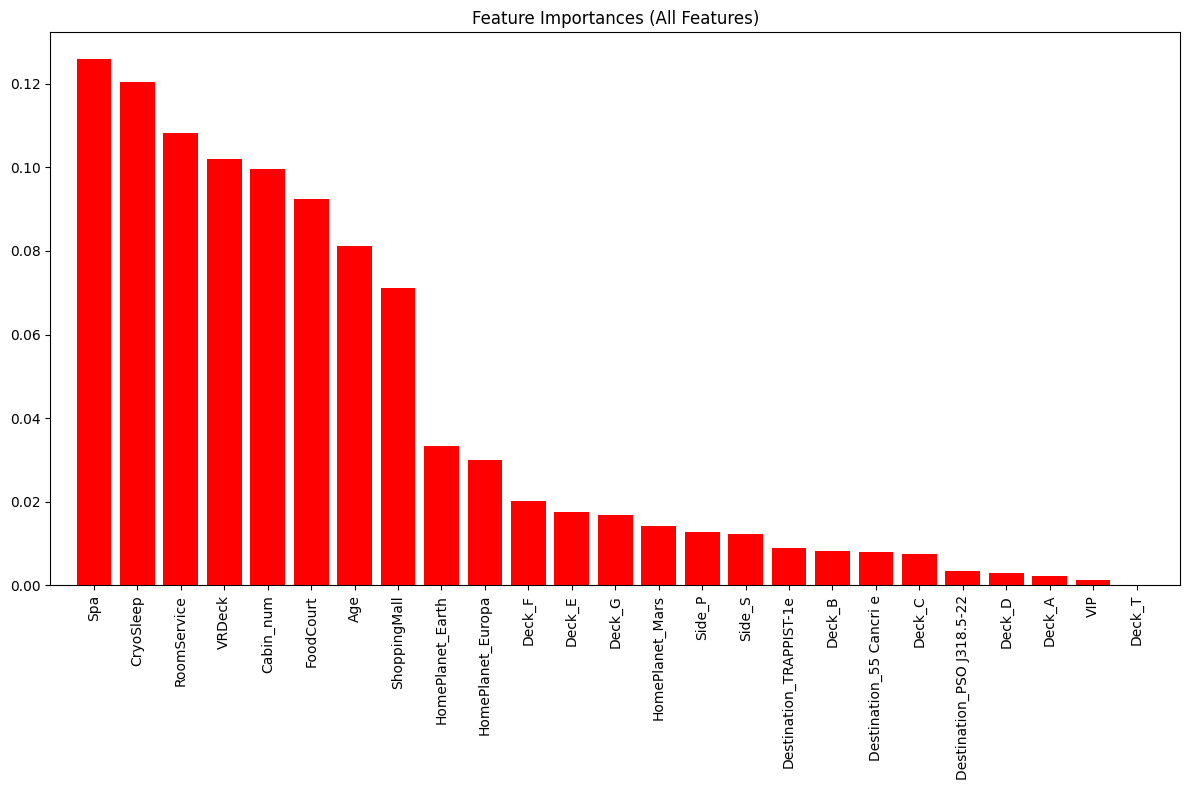

In [59]:
# ** IMPORTANCIA DE LAS CARACTERÍSTICAS **

# Entrenar Random Forest con el mejor modelo para obtener la importancia de las características
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = best_rf_model.feature_importances_

# Ordenar características por importancia
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de todas las características
print("Feature ranking (all features):")
for i in range(len(X.columns)):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Visualizar la importancia de todas las características
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (All Features)")
plt.bar(range(len(X.columns)), importances[indices], color="r", align="center")
plt.xticks(range(len(X.columns)), X.columns[indices], rotation=90)
plt.xlim([-1, len(X.columns)])
plt.tight_layout()  # Ajustar la gráfica para que no se corten las etiquetas
plt.show()

In [60]:
# Eliminar la columna 'VIP' del conjunto de datos
X_train_reduced = X_train.drop(columns=['VIP'])
X_test_reduced = X_test.drop(columns=['VIP'])

In [61]:
# Volver a entrenar el modelo con las características restantes
best_rf_model.fit(X_train_reduced, y_train)

# Predecir en el conjunto de prueba con el modelo ajustado
y_pred_model_rf_reduced = best_rf_model.predict(X_test_reduced)

# Evaluar el modelo
accuracy_model_rf_reduced = accuracy_score(y_test, y_pred_model_rf_reduced)
print(f"Random Forest Accuracy (after removing VIP): {accuracy_model_rf_reduced:.4f}")

Random Forest Accuracy (after removing VIP): 0.8029
